# Student Performance (Multiple Linear Regression)

#### Import default libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Import dataset

In [40]:
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


#### Data cleaning

In [42]:
## Checking for null and duplicates

df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [43]:
print('Duplicates are : ',df.duplicated().sum())

Duplicates are :  127


In [44]:
df = df.drop_duplicates()
print('Duplicates are : ',df.duplicated().sum())

Duplicates are :  0


In [45]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [46]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [47]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


In [49]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [50]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#### EDA

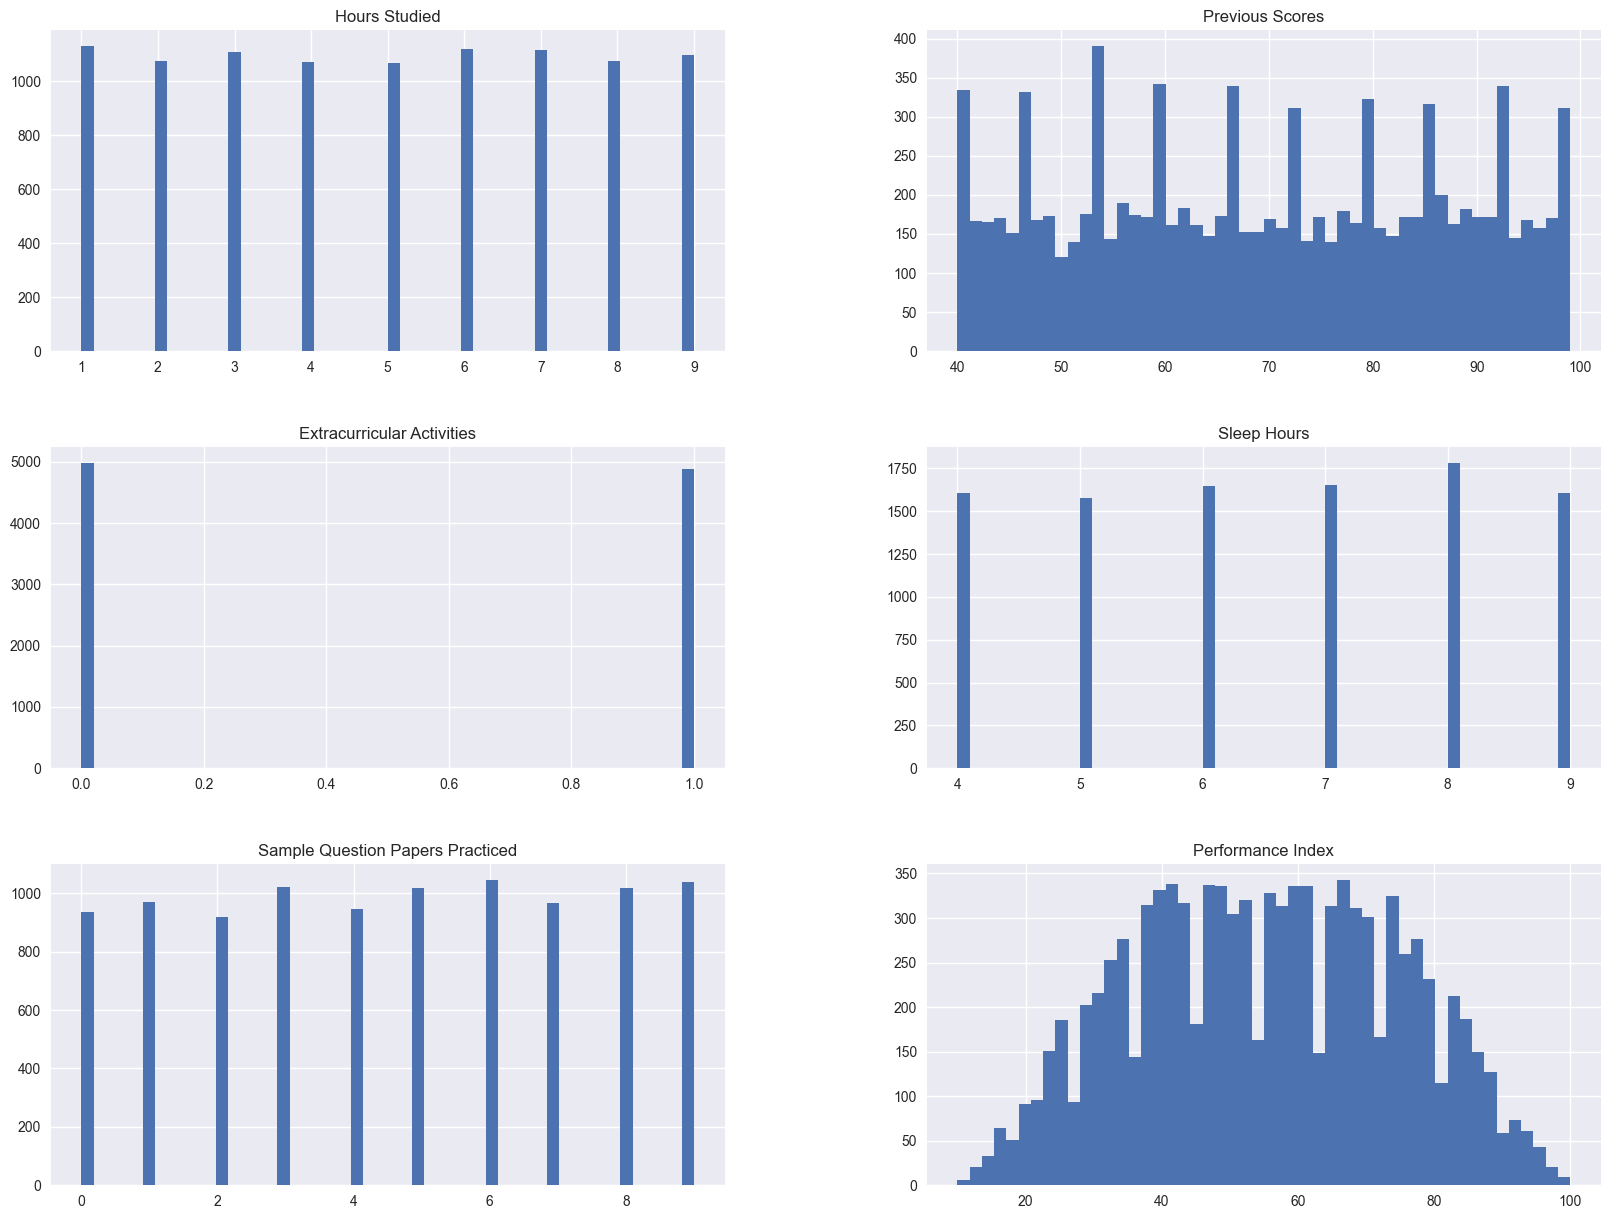

In [51]:
## Plot density plots for all features.
plt.style.use('seaborn-v0_8')
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [52]:
## Correlation

df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


<Axes: >

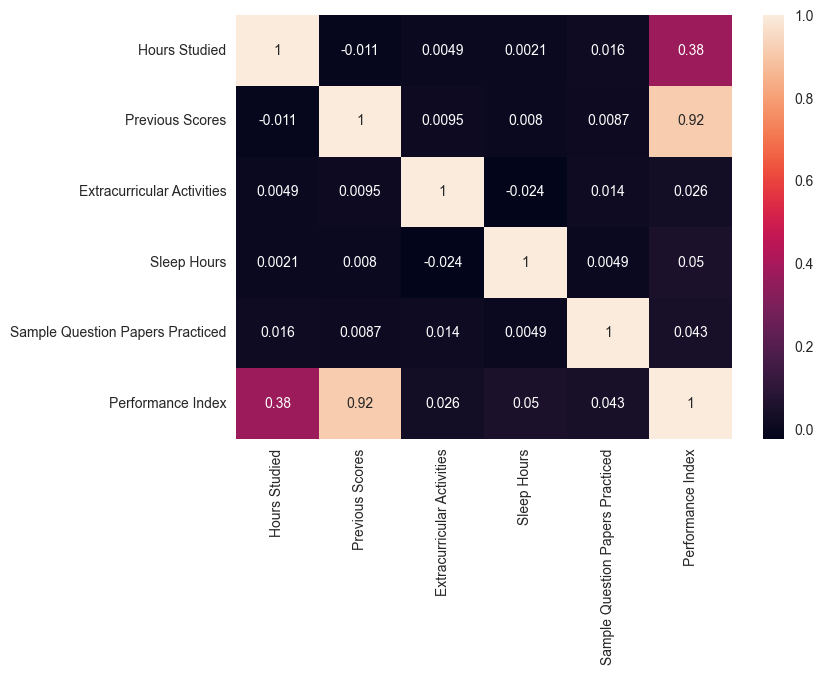

In [53]:
sns.heatmap(df.corr(), annot=True)

## Model Training

In [54]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [55]:
## Independent and Dependent Features.
X=df.iloc[:, :-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [56]:
y=df.iloc[:, -1]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [57]:
## Train/Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=38)

In [58]:
X_train.shape, y_train.shape

((6911, 5), (6911,))

In [59]:
X_test.shape, y_test.shape

((2962, 5), (2962,))

In [60]:
## Feature Scaling or Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [64]:
X_train_scaled

array([[-0.76288094,  0.08945316, -0.999566  , -0.31620421,  1.19122973],
       [-1.53384975, -0.37176912,  1.00043418,  0.86216586, -0.55170728],
       [ 1.16454108, -1.52482482, -0.999566  , -0.90538924,  0.14546753],
       ...,
       [-1.14836535, -0.02585241,  1.00043418,  1.45135089, -1.24888208],
       [ 0.77905667,  0.08945316, -0.999566  ,  1.45135089, -0.55170728],
       [ 1.16454108,  0.08945316, -0.999566  , -0.31620421, -0.55170728]],
      shape=(6911, 5))

In [63]:
X_test_scaled

array([[ 0.77905667,  1.30016165, -0.999566  ,  0.86216586, -0.55170728],
       [ 0.77905667, -0.31411633,  1.00043418,  0.27298082, -1.59746949],
       [-0.37739654, -0.60238026,  1.00043418, -0.31620421,  0.84264233],
       ...,
       [-1.53384975, -0.25646355,  1.00043418, -0.31620421,  0.84264233],
       [ 0.39357227,  0.26241152, -0.999566  , -1.49457428,  0.49405493],
       [ 1.16454108, -1.29421368,  1.00043418, -0.90538924,  1.53981713]],
      shape=(2962, 5))

### Box plot to understand the effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

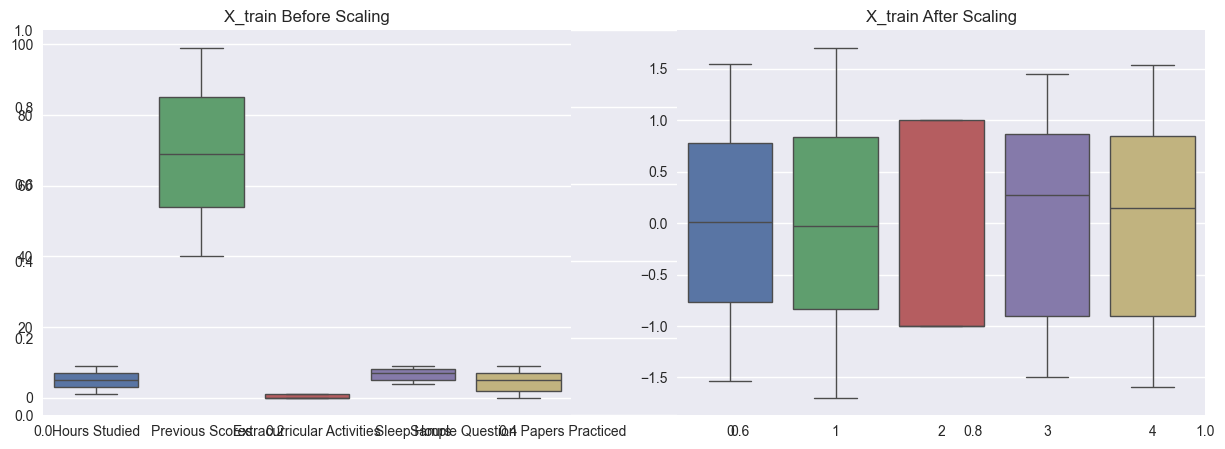

In [65]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2, 2)
sns.boxplot(data=X_test_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

Mean absolute error :  1.6332673169853875
R2 Score :  0.9884838336677773


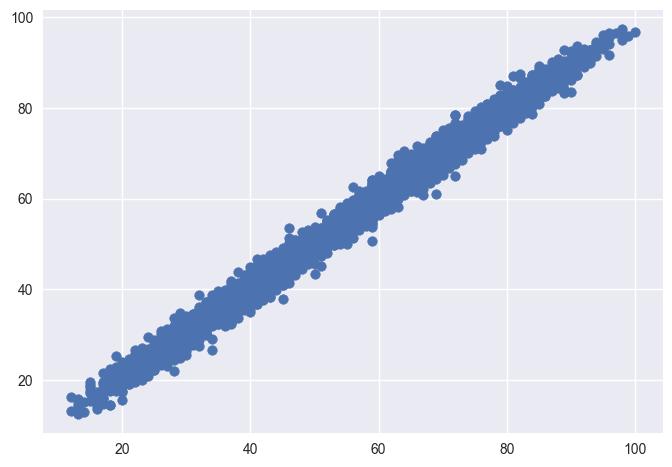

In [72]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

linreg.fit(X_train_scaled, y_train) # ! Training of Model

## Model Prediction

y_pred=linreg.predict(X_test_scaled) # ! Model Prediction using Test data

## Model evaluation

from sklearn.metrics import mean_absolute_error, r2_score
mae=mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

## Lasso Regression Model

Mean absolute error :  2.136207744597821
R2 Score :  0.9803048161089293


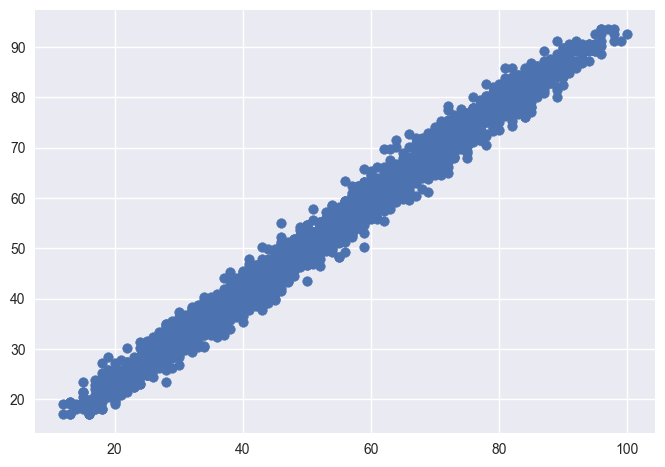

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

## Ridge Regression Model

Mean absolute error :  1.6332388574076422
R2 Score :  0.9884842672118691


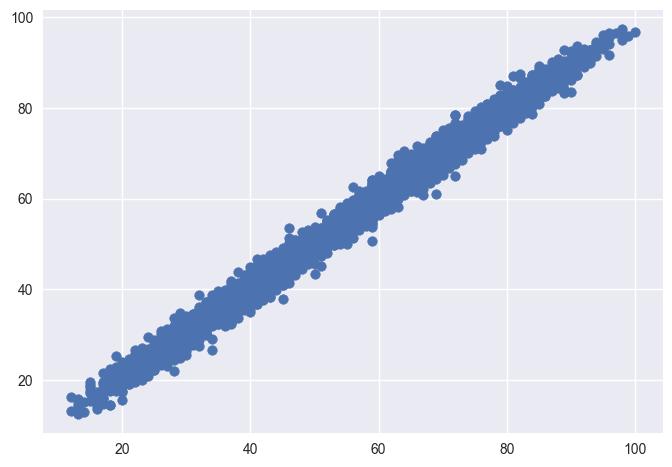

In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

## ElasticNet Regression Model

Mean absolute error :  5.9660221289310575
R2 Score :  0.8606166865702354


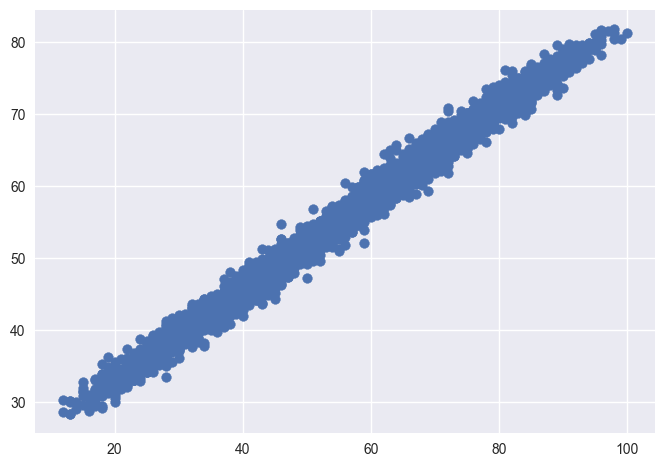

In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elnet=ElasticNet()
elnet.fit(X_train_scaled, y_train)
y_pred=elnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

## ⭐Among Ridge, Lasso, Linear and ElasticNet the performance of Ridge Model is Best

### Doing Cross Validation for all Models

Mean absolute error :  1.633098926322172
R2 Score :  0.9884874494525091


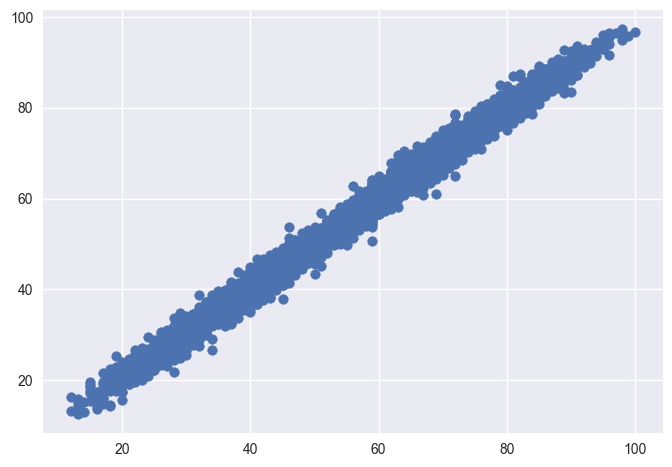

In [76]:
## Cross Validation Lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)

Mean absolute error :  1.6332644706654347
R2 Score :  0.9884838789316236


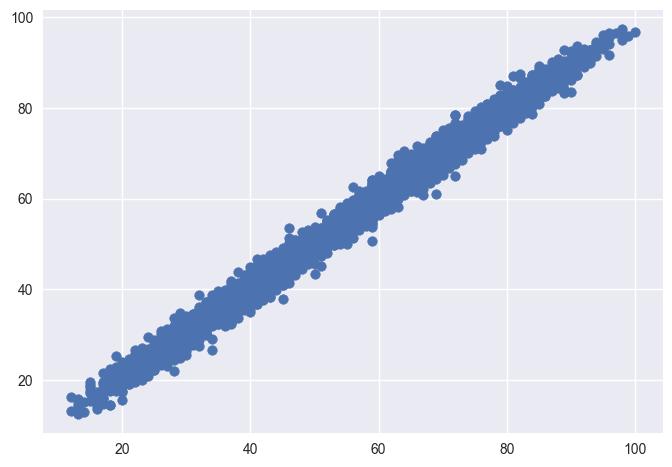

In [77]:
## Cross Validation Ridge

from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)

Mean absolute error :  1.6564379508713902
R2 Score :  0.9881971346631483


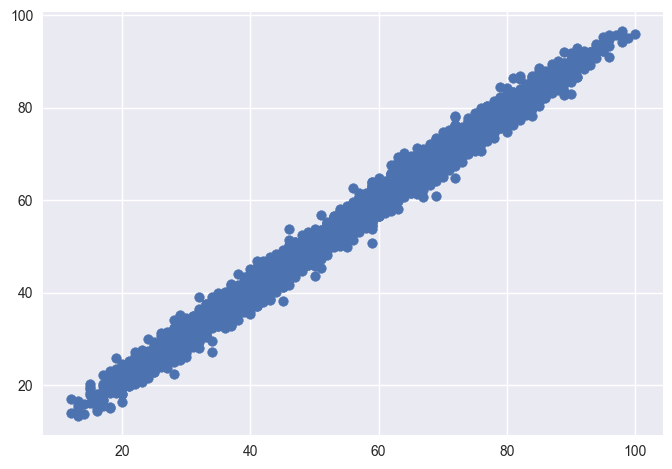

In [78]:
## Cross Validation ElasticNet

from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", score)

## ⭐Ridge model is best after cross validation of all models

## Pickling the Model

In [79]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))
